In [1]:
# FC20_MMAX.IPYNB -- extract the Mmax posterior samples from Farr+Chatziioannou 2020; adapted from https://github.com/farr/AlsingNSMassReplication/blob/master/AlsingReconstruction.ipynb
# needs ar.nc from https://github.com/farr/AlsingNSMassReplication

In [2]:
# load some packages, etc.

%pylab inline
%config InlineBackend.figure_format = 'retina'

import arviz as az
#import astropy.io.ascii as aia
#import h5py
import pandas as pd
#import pystan
import re
import scipy.stats as ss
import seaborn as sns
from tqdm import tqdm

sns.set_context('notebook')
sns.set_palette('colorblind')
sns.set_style('ticks')

colwidth = 433.62 / 72.0 # inches

pub_rc = {
    'figure.figsize': (colwidth, colwidth),
    'text.usetex': True
}

Populating the interactive namespace from numpy and matplotlib


In [3]:
# load the data

fit = az.from_netcdf('ar.nc')
mmax_samples = fit.posterior.mmax.values.flatten()
print(mmax_samples)

[2.75336914 2.38990216 2.09964574 ... 2.23283693 2.14548581 2.18903583]


Text(0, 0.5, '$p\\left( m_\\mathrm{max} \\mid d \\right)$')

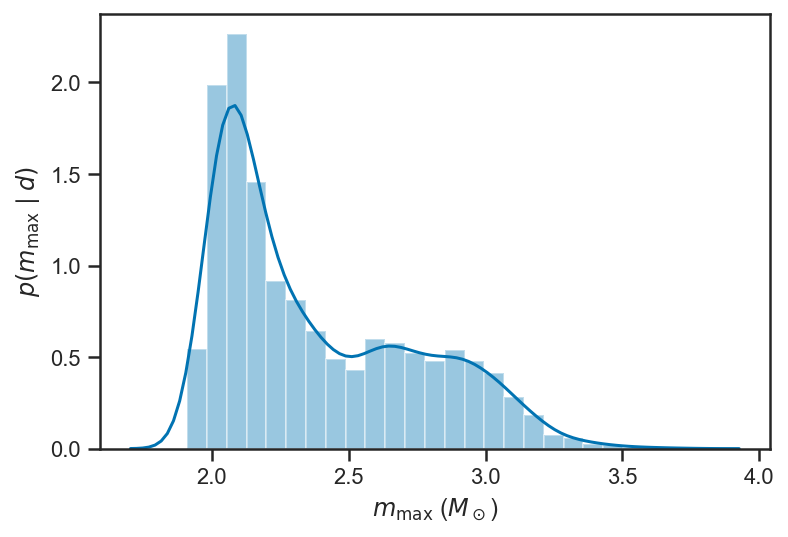

In [4]:
# plot it

sns.distplot(mmax_samples)
xlabel(r'$m_\mathrm{max}$ ($M_\odot$)')
ylabel(r'$p\left( m_\mathrm{max} \mid d \right)$')

(0.0, 9.0)

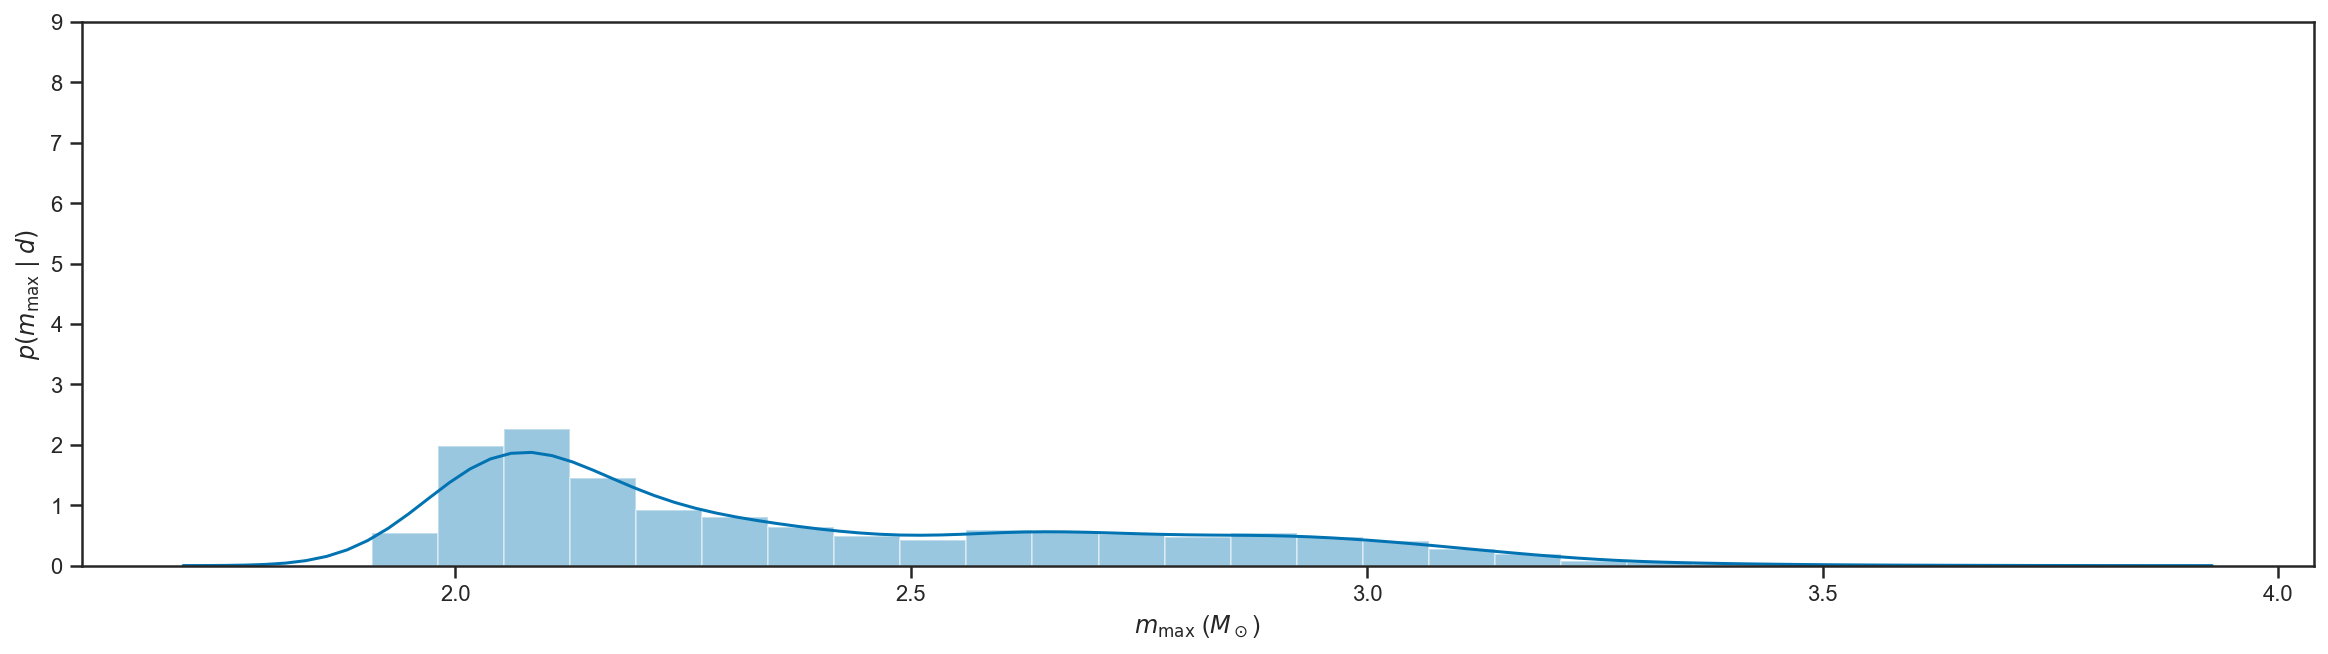

In [5]:
# plot it again, but on a scale that resembles Fig. 3 in the 190814 discovery paper

plt.figure(figsize=(20,5))
sns.distplot(mmax_samples)
xlabel(r'$m_\mathrm{max}$ ($M_\odot$)')
ylabel(r'$p\left( m_\mathrm{max} \mid d \right)$')
ylim(0.,9.)

In [6]:
# get the median and 90% confidence interval

print(np.percentile(mmax_samples,50.))
print([np.percentile(mmax_samples,5.),np.percentile(mmax_samples,95.)])

2.246913351628736
[1.9878724277463038, 3.063465041629044]


In [7]:
# save the samples

np.savetxt("mmax_fc20.csv",np.array(mmax_samples),header="Mmax",comments="")